In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/data-science-bowl-2019/sample_submission.csv
/kaggle/input/data-science-bowl-2019/specs.csv
/kaggle/input/data-science-bowl-2019/train_labels.csv
/kaggle/input/data-science-bowl-2019/test.csv
/kaggle/input/data-science-bowl-2019/train.csv


In [2]:
import csv
import pprint
import json
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
prefix = '/kaggle/input/data-science-bowl-2019'
specs = pd.read_csv(f'{prefix}/specs.csv', encoding='utf-8')
train_data = pd.read_csv(f'{prefix}/train.csv', encoding='utf-8')
label = pd.read_csv(f'{prefix}/train_labels.csv', encoding='utf-8')

In [4]:
print(f'---TRAIN---\nShape: {train_data.shape} \nColumns: {train_data.columns}')
print(f'---SPECS---\nShape: {specs.shape} \nColumns: {specs.columns}')
print(f'---LABEL---\nShape: {label.shape} \nColumns: {label.columns}')

---TRAIN---
Shape: (11341042, 11) 
Columns: Index(['event_id', 'game_session', 'timestamp', 'event_data',
       'installation_id', 'event_count', 'event_code', 'game_time', 'title',
       'type', 'world'],
      dtype='object')
---SPECS---
Shape: (386, 3) 
Columns: Index(['event_id', 'info', 'args'], dtype='object')
---LABEL---
Shape: (17690, 7) 
Columns: Index(['game_session', 'installation_id', 'title', 'num_correct',
       'num_incorrect', 'accuracy', 'accuracy_group'],
      dtype='object')


## Specs Data

In [5]:
print(f'Shape: {specs.shape} \nColumns: {specs.columns}')
print('-' * 5 + 'Frist Entry' + '-' * 5)
pprint.pprint(specs.iloc[0,])
print('-' * 5 + 'Frist Entry args' + '-' * 5)
args = json.loads(specs.iloc[0, -1])
pprint.pprint(args)

Shape: (386, 3) 
Columns: Index(['event_id', 'info', 'args'], dtype='object')
-----Frist Entry-----
event_id                                             2b9272f4
info        The end of system-initiated feedback (Correct)...
args        [{"name":"game_time","type":"int","info":"mill...
Name: 0, dtype: object
-----Frist Entry args-----
[{'info': 'millisecond count since start of game',
  'name': 'game_time',
  'type': 'int'},
 {'info': 'number of the current round when the event takes place or 0 if no '
          'round',
  'name': 'round',
  'type': 'int'},
 {'info': 'number of the current level when the event takes place or 0 if no '
          'level',
  'name': 'level',
  'type': 'int'},
 {'info': 'the text or description of the instruction',
  'name': 'description',
  'type': 'string'},
 {'info': 'a unique identifier for this piece of instruction',
  'name': 'identifier',
  'type': 'string'},
 {'info': 'the type of media that has just played:\n'
          "'audio' || 'animation' || '

## Training Label

In [6]:
print(f'Shape: {label.shape} \nColumns: {label.columns}')
print('-' * 5 + 'Frist Entry' + '-' * 5)
pprint.pprint(label.iloc[0,])
pprint.pprint(label.iloc[:,2].unique())

Shape: (17690, 7) 
Columns: Index(['game_session', 'installation_id', 'title', 'num_correct',
       'num_incorrect', 'accuracy', 'accuracy_group'],
      dtype='object')
-----Frist Entry-----
game_session                   6bdf9623adc94d89
installation_id                        0006a69f
title              Mushroom Sorter (Assessment)
num_correct                                   1
num_incorrect                                 0
accuracy                                      1
accuracy_group                                3
Name: 0, dtype: object
array(['Mushroom Sorter (Assessment)', 'Bird Measurer (Assessment)',
       'Cauldron Filler (Assessment)', 'Chest Sorter (Assessment)',
       'Cart Balancer (Assessment)'], dtype=object)


accuracy_group                   0    1    2     3
title                                             
Bird Measurer (Assessment)     886  778  389   693
Cart Balancer (Assessment)     576  353  470  2752
Cauldron Filler (Assessment)   421  459  630  2545
Chest Sorter (Assessment)     1752  466  256   507
Mushroom Sorter (Assessment)   594  355  460  2348


Text(0.5, 1.0, 'count of each accuray group for each assessment')

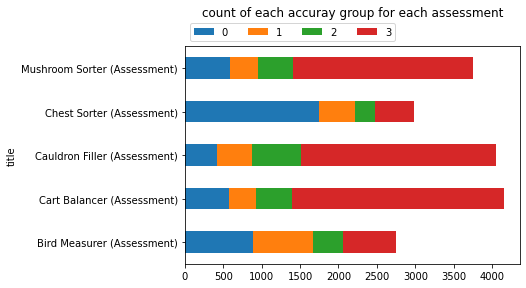

In [7]:
count_by_title = label.iloc[:,[0, 2, 6]].groupby(['title', 'accuracy_group'])['game_session'].count().unstack('accuracy_group')
print(count_by_title)
ax = count_by_title.plot.barh(stacked=True)
ax.legend(ncol=4, bbox_to_anchor=(0, 1), loc='lower left')
plt.title('count of each accuray group for each assessment', pad = 30)

## Training Data

In [8]:
train_data.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [9]:
# remove installations don't contain assessment data
ids = train_data[train_data.type=='Assessment']['installation_id'].unique()
filt_train = train_data[train_data.installation_id.isin(ids)]
print(train_data.shape[0] - filt_train.shape[0])
print(filt_train.shape)
print(train_data['installation_id'].unique().shape)
print(filt_train['installation_id'].unique().shape)

3046904
(8294138, 11)
(17000,)
(4242,)


In [10]:
filt_train[filt_train.world=='NONE'][filt_train.event_code!=2000]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world


In [11]:
filt_train = filt_train[filt_train.world!='NONE']
filt_train.shape

(8286145, 11)

In [12]:
# sample by installation id to reduce data entry
sample_ids = filt_train.groupby('installation_id').agg({'installation_id': ['count']}).sample(500)
sample_train = filt_train[filt_train.installation_id.isin(sample_ids.index)]
print(filt_train.shape)
print(sample_train.shape)
print(sample_train['game_session'].unique().shape)
# remove game sessions that only contain one row
sess = sample_train.groupby('game_session', sort=False).count().iloc[:, 0]
sample_train = sample_train[sample_train.game_session.isin(sess[sess > 1].index)]
print(sample_train.shape)
print(sample_train['game_session'].unique().shape)

(8286145, 11)
(1101566, 11)
(23936,)
(1089804, 11)
(12174,)


In [13]:
sample_train.to_csv('train_sample.csv', index=False)

Text(0.5, 1.0, 'count of each title')

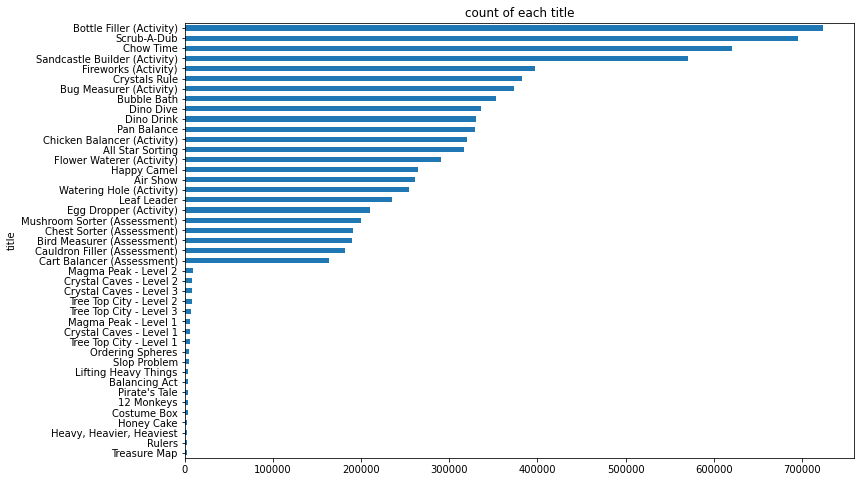

In [14]:
title_count = filt_train.groupby('title').count()['game_session'].sort_values()
fig = plt.figure(figsize=(12,8))
ax = title_count.plot.barh()
plt.title('count of each title')

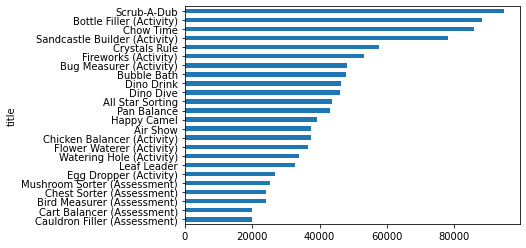

In [15]:
title_count_sample = sample_train.groupby('title').count()['game_session'].sort_values()
ax = title_count_sample.plot.barh()

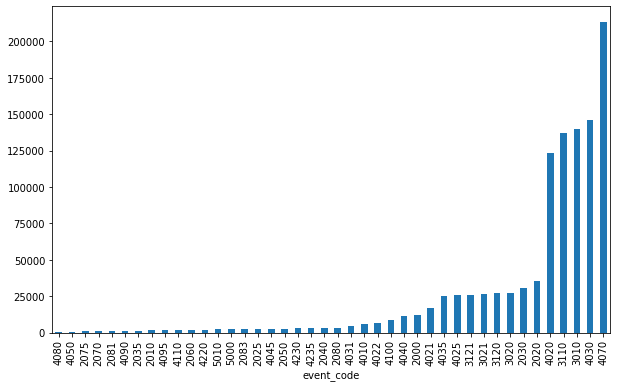

In [16]:
fig = plt.figure(figsize=(10,6))
sample_train.groupby('event_code').count()['game_session'].sort_values().plot.bar()

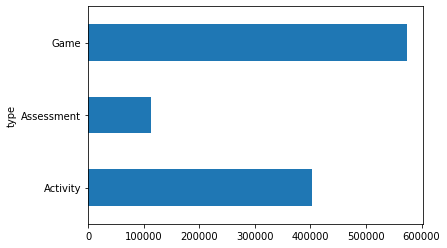

In [17]:
sample_train.groupby('type').count()['game_session'].plot.barh()

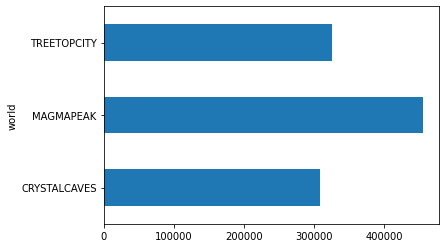

In [18]:
sample_train.groupby('world').count()['game_session'].plot.barh()

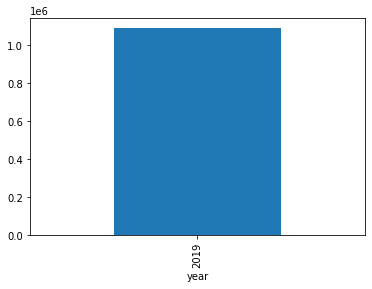

In [19]:
sample_train['timestamp'] = pd.to_datetime(sample_train['timestamp'])
sample_train['year'] = sample_train['timestamp'].dt.year
sample_train.groupby('year').count()['game_session'].plot.bar()

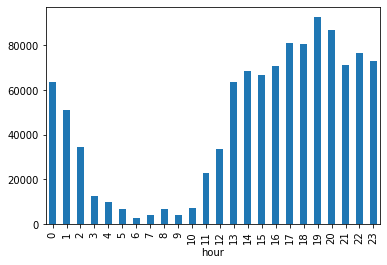

In [20]:
sample_train['hour'] = sample_train['timestamp'].dt.hour
sample_train.groupby('hour').count()['game_session'].plot.bar()

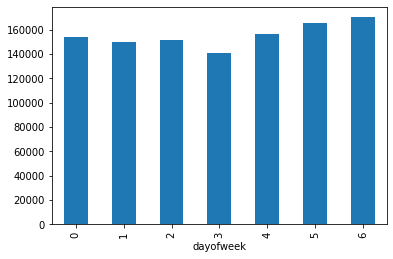

In [21]:
sample_train['dayofweek'] = sample_train['timestamp'].dt.dayofweek
sample_train.groupby('dayofweek').count()['game_session'].plot.bar()

Feature extraction

In [22]:
COLUMNS = ['installation_id', 'game_session', 'sess_count', 'title', 'type', 'world', 'event_count', 
           'event_count_total', 'time_start', 'time_end', 'duration', 'day_of_week', 'hour']
data_set = []
all_event_key = sample_train['event_code'].unique()
sum_all_event_key = [str(e)+'_sum' for e in all_event_key]
for iid, group in tqdm(sample_train.groupby('installation_id')):
    type_count = {'Game':0, 'Activity': 0, 'Assessment': 0}
    world_count = {'TREETOPCITY': 0, 'MAGMAPEAK': 0, 'CRYSTALCAVES': 0}
    assessment = {'Correct': 0, 'Incorrect': 0, 'Acc': 0, 'Acc_group': 0, 
                  'Correct_total': 0, 'Incorrect_total': 0, 'Acc_total': 0, 'Acc_avg': 0, 'Acc_group_avg': 0}
    ass_count = 0
    sess_count = 0
    sum_all_event = {}
    for e in sum_all_event_key:
        sum_all_event[e] = 0
    event_count_total = 0
    prev_event = None
    for session, sess_data in group.groupby('game_session', sort=False):
        start, end = sess_data.iloc[0], sess_data.iloc[-1]
        feature = [iid, session, sess_count, start['title'], start['type'], start['world'], end['event_count'], event_count_total]
        # time related information
        feature.extend([start['timestamp'], end['timestamp'], end['game_time'], start['dayofweek'], start['hour']])
        feature = pd.DataFrame([feature], columns=COLUMNS)
        
        events = sess_data.groupby('event_code').count()['game_session'].to_frame().T.reset_index().drop('index', axis=1)
        for e in all_event_key:
            if e not in events.columns:
                events[e] = 0
        if prev_event is None:
            prev_event = events.copy()
        past_event = prev_event.copy()
        past_event.columns = [str(e)+'_sum' for e in past_event.columns]
        data_set.append(pd.concat([feature, pd.DataFrame([type_count]), pd.DataFrame([world_count]), 
                                   events, past_event, pd.DataFrame([assessment])], axis=1))
        
        sess_count += 1
        event_count_total += end['event_count']
        # historical information
        type_count[start['type']] += 1
        world_count[start['world']] += 1
        prev_event += events
        
        
        if (start['type'] == 'Assessment'):
            ass_count += 1
            all_attempts = sess_data[sess_data.event_code==4100]
            if not all_attempts.shape[1]:
                all_attempts = sess_data[sess_data.event_code==4110]
            num_correct = sum([json.loads(attempt['event_data'])['correct'] for _, attempt in all_attempts.iterrows()])
            total = all_attempts.shape[0]
            assessment['Correct'] = num_correct
            assessment['Incorrect'] = total - num_correct
            assessment['Acc'] = num_correct/total if total else 0
            if assessment['Acc'] == 1:
                assessment['Acc_group'] = 3
            elif assessment['Acc'] == 0.5:
                assessment['Acc_group'] = 2
            elif assessment['Acc'] == 0:
                assessment['Acc_group'] = 0
            else:
                assessment['Acc_group'] = 1
            assessment['Correct_total'] += assessment['Correct']
            assessment['Incorrect_total'] += assessment['Incorrect']
            sum_total = assessment['Correct_total']+assessment['Incorrect_total']
            assessment['Acc_total'] = assessment['Correct_total']/sum_total if sum_total else 0
            assessment['Acc_avg'] = (assessment['Acc_avg'] * (ass_count-1) + assessment['Acc']) / ass_count
            assessment['Acc_group_avg'] = (assessment['Acc_group_avg'] * (ass_count-1) + assessment['Acc_group']) / ass_count
        else:
            assessment['Correct'] = 0
            assessment['Incorrect'] = 0
            assessment['Acc'] = 0
            assessment['Acc_group'] = 0
#         data_set.append(pd.concat([feature, pd.DataFrame([type_count]), pd.DataFrame([world_count]), 
#                                    events, past_event, pd.DataFrame([assessment])], axis=1))
data = pd.concat(data_set, sort=False).fillna(0).reset_index().drop('index', axis=1)

100%|██████████| 499/499 [08:57<00:00,  1.08s/it]


In [23]:
data.head()

,installation_id,game_session,sess_count,title,type,world,event_count,event_count_total,time_start,time_end,...,4080_sum,Correct,Incorrect,Acc,Acc_group,Correct_total,Incorrect_total,Acc_total,Acc_avg,Acc_group_avg
0,003372b0,872809094d61afe0,0,All Star Sorting,Game,TREETOPCITY,49,0,2019-09-26 13:09:56.381000+00:00,2019-09-26 13:11:12.924000+00:00,...,0,0,0,0.0,0,0,0,0.0,0.0,0.0
1,003372b0,5a69225f73a34b18,1,Fireworks (Activity),Activity,TREETOPCITY,107,49,2019-09-26 13:12:39.301000+00:00,2019-09-26 13:14:04.766000+00:00,...,0,0,0,0.0,0,0,0,0.0,0.0,0.0
2,003372b0,50c66f542e232354,2,Flower Waterer (Activity),Activity,TREETOPCITY,24,156,2019-09-26 13:17:27.467000+00:00,2019-09-26 13:18:15.015000+00:00,...,0,0,0,0.0,0,0,0,0.0,0.0,0.0
3,003372b0,631971b2efa19b8d,3,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,35,180,2019-09-26 13:20:02.651000+00:00,2019-09-26 13:20:37.132000+00:00,...,0,0,0,0.0,0,0,0,0.0,0.0,0.0
4,003372b0,a3c224d11ba493fb,4,Air Show,Game,TREETOPCITY,72,215,2019-09-26 13:20:56.759000+00:00,2019-09-26 13:23:41.687000+00:00,...,0,1,0,1.0,3,1,0,1.0,1.0,3.0


In [24]:
data.shape

(12174, 112)

In [25]:
data.to_csv('data.csv', index=False)

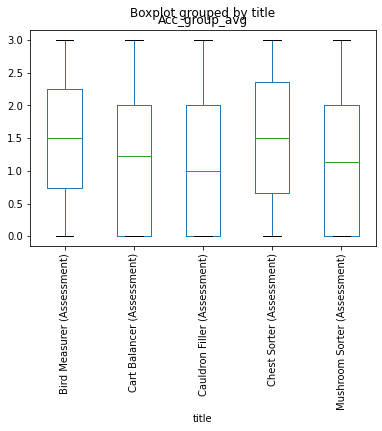

In [26]:
data[data.type=='Assessment'].boxplot(column='Acc_group_avg', by='title', rot=90, grid=False)

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff08ed37c50>,
      dtype=object)

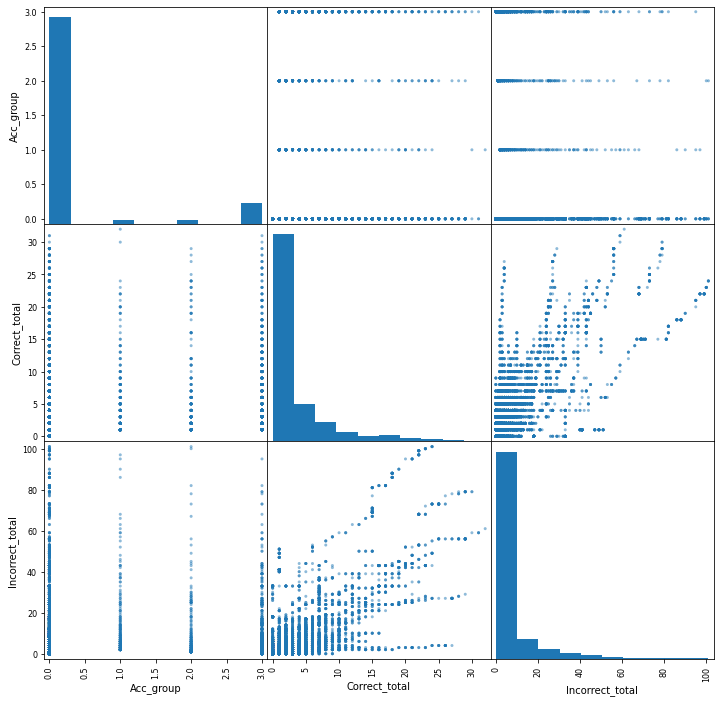

In [27]:
pd.plotting.scatter_matrix(data.iloc[:, -6:-3], figsize=(12, 12))